In [1]:
### RUN ONLY ONCE
from ctgan.utils import save_real_df, save_fake_df
for dset in ['adult']:
    save_real_df(dset)
    save_fake_df(dset)

Real data dataframe for adult dataset saved: /home/y2k/CSC2516_Project/dataset/adult/real_data.csv
Real test dataframe for adult dataset saved: /home/y2k/CSC2516_Project/dataset/adult/real_test.csv
Fake dataframe for adult (vanilla) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_data_vanilla.csv
Fake dataframe for adult (denoising) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_data_denoising.csv
Fake dataframe for adult (vae) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_data_vae.csv
Fake dataframe for adult (ee) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_data_ee.csv
Fake dataframe for adult (vanilla) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_test_vanilla.csv
Fake dataframe for adult (denoising) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_test_denoising.csv
Fake dataframe for adult (vae) dataset saved: /home/y2k/CSC2516_Project/dataset/adult/fake_test_vae.csv
Fake dataframe for adult (ee) datase

In [2]:
import json

from evaluation import get_utility_metrics, stat_sim
from ctgan.utils import BASE_DIR, get_cols

AE_TYPES = ['vanilla', 'denoising', 'vae', 'ee']
PATHS = {
    'adult': {
        'real' : {
            'train': f"{BASE_DIR}/dataset/adult/real_data.csv",
            'test': f"{BASE_DIR}/dataset/adult/real_test.csv"
        },
        'fake' : {
            'train': {
                'vanilla' : f"{BASE_DIR}/dataset/adult/fake_data_vanilla.csv",
                'denoising' : f"{BASE_DIR}/dataset/adult/fake_data_denoising.csv",
                'vae' : f"{BASE_DIR}/dataset/adult/fake_data_vae.csv",
                'ee' : f"{BASE_DIR}/dataset/adult/fake_data_ee.csv"
            },
            'test': {
                'vanilla' : f"{BASE_DIR}/dataset/adult/fake_test_vanilla.csv",
                'denoising' : f"{BASE_DIR}/dataset/adult/fake_test_denoising.csv",
                'vae' : f"{BASE_DIR}/dataset/adult/fake_test_vae.csv",
                'ee' : f"{BASE_DIR}/dataset/adult/fake_test_ee.csv"
            }
        }
    }
}

with open(f"{BASE_DIR}/results/stat_sim.json", 'r') as f:
    STAT_SIM = json.load(f)

with open(f"{BASE_DIR}/results/ml_efficacy.json", 'r') as f:
    ML_EFFICACY = json.load(f)

## Adult

#### ML Efficacy

In [ ]:
for ae_type in AE_TYPES:
    ML_EFFICACY['adult'][ae_type] = get_utility_metrics(real_path=PATHS['adult']['real']['test'],
                                                        fake_paths=PATHS['adult']['fake']['test'][ae_type])

with open(f"{BASE_DIR}/results/ml_efficacy.json", 'w') as f:
    f.write(json.dumps(ML_EFFICACY))

#### Statistical Similarity

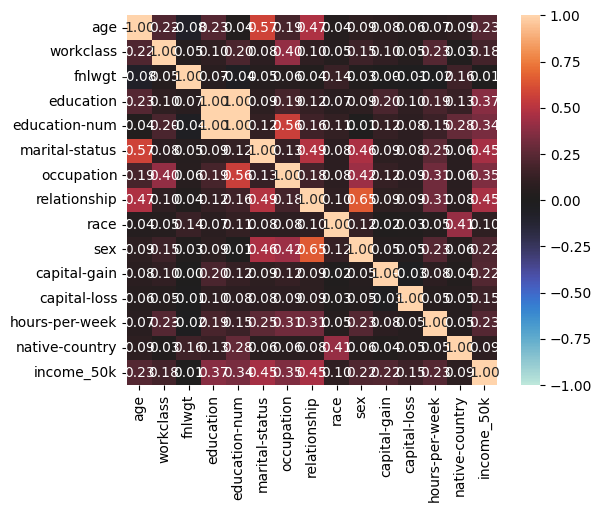

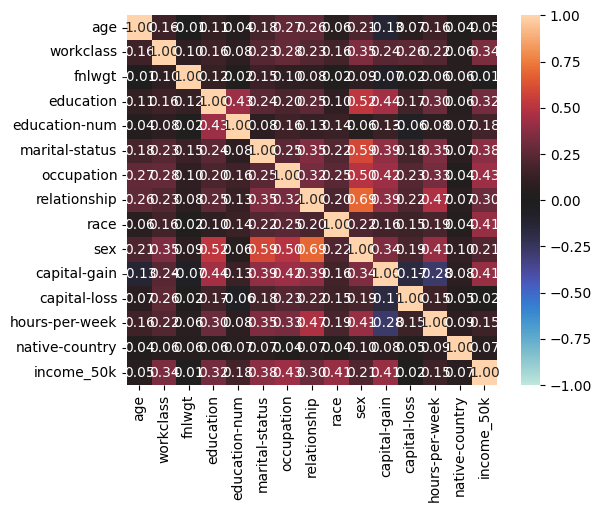

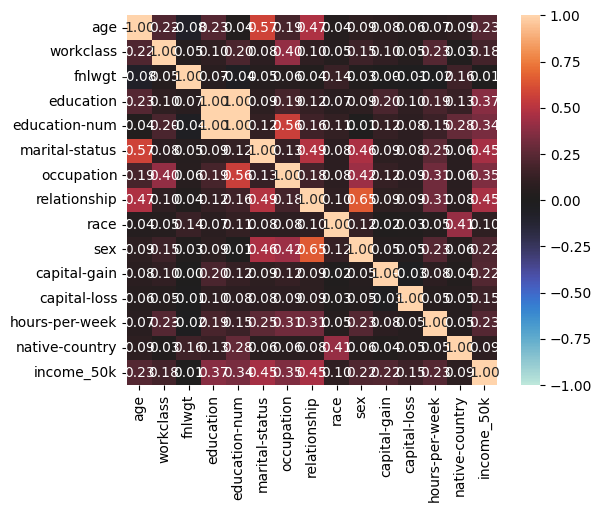

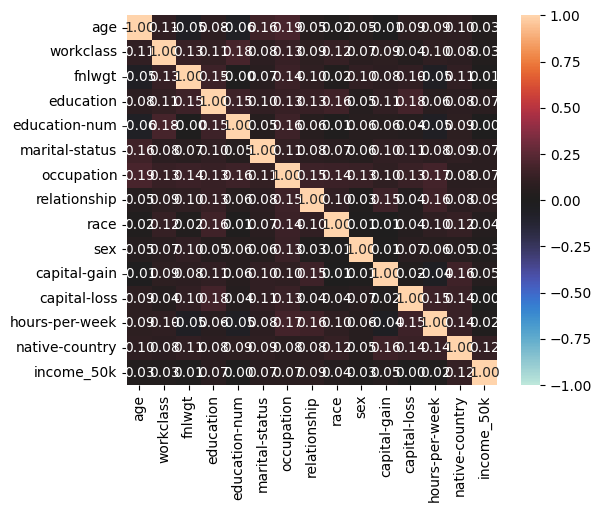

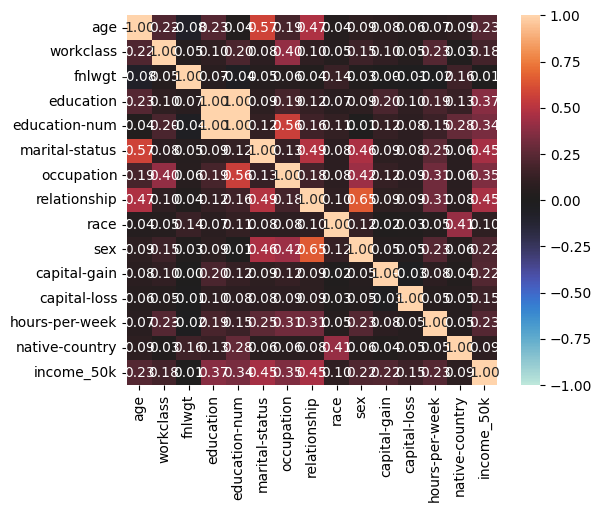

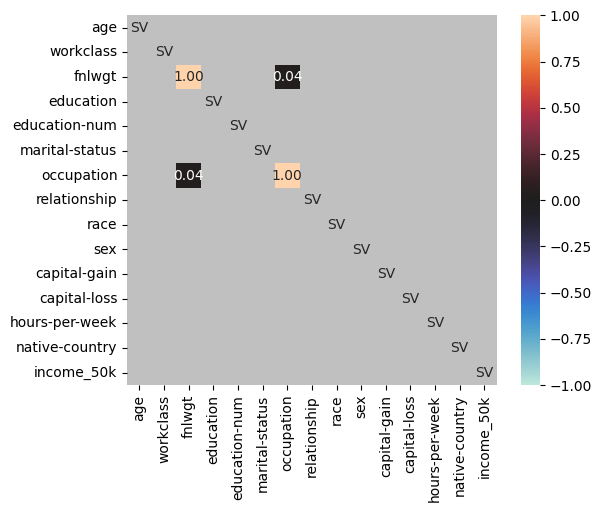

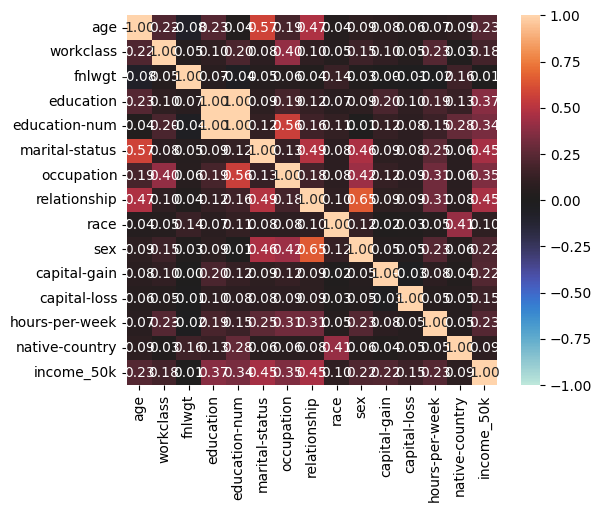

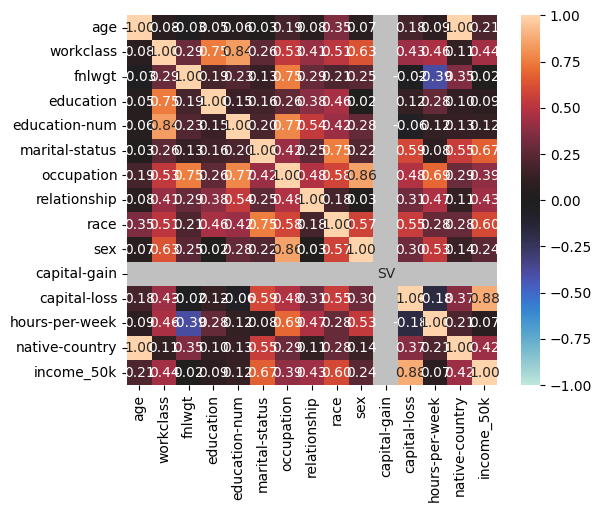

In [3]:
out = get_cols("adult")

for ae_type in AE_TYPES:
    STAT_SIM['adult'][ae_type] = stat_sim(real_path=PATHS['adult']['real']['train'],
                                          fake_path=PATHS['adult']['fake']['train'][ae_type],
                                          cat_cols=out['discrete_cols'][1])

with open(f"{BASE_DIR}/results/stat_sim.json", 'w') as f:
    f.write(json.dumps(STAT_SIM))